In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from IPython.display import display, HTML

#Sets jupyter width to 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
#pd.set_option('display.max_colwidth', None)

In [4]:
#plt.style.use('ggplot')
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

In [5]:
df_info = pd.read_csv("profiles_data.csv", sep = "|",index_col=0)

In [97]:
df_posts = pd.read_csv("posts_data.csv", sep = "|",index_col=0)

In [7]:
mask = (df_posts['date_year_month2'] < "2020-07") & (df_posts['date_year_month2'] > "2019-02")
df_posts = df_posts.loc[mask]

In [8]:
len(df_posts)

22722

In [9]:
plot_df = pd.DataFrame(df_posts.groupby(["date_year_month2"]).size())

### Plotting functions

In [12]:
def plot_two_bars(plot_df):
    labels = ['March', 'April', 'May']
    means_2019 = [plot_df.loc["2019-03"].values[0], plot_df.loc["2019-04"].values[0], plot_df.loc["2019-05"].values[0]]
    means_2020 = [plot_df.loc["2020-03"].values[0], plot_df.loc["2020-04"].values[0], plot_df.loc["2020-05"].values[0]]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,5))
    rects1 = ax.bar(x - width/2, means_2019, width, label='2019')
    rects2 = ax.bar(x + width/2, means_2020, width, label='2020')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Posts')
    ax.set_title('Posts by year and month')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
 
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    
    #plt.savefig("2bars.pdf")

    plt.show()

In [13]:
def get_percentages(plot_df):
    mar = (plot_df.loc["2020-03"].values[0] - plot_df.loc["2019-03"].values[0])/plot_df.loc["2019-03"].values[0]
    apr = (plot_df.loc["2020-04"].values[0] - plot_df.loc["2019-04"].values[0])/plot_df.loc["2019-04"].values[0]
    may = (plot_df.loc["2020-05"].values[0] - plot_df.loc["2019-05"].values[0])/plot_df.loc["2019-05"].values[0]
    return(mar,apr,may)

In [14]:
def get_total_percentage(plot_df):
    
    a = plot_df.loc["2020-03"].values[0] + plot_df.loc["2020-04"].values[0] + plot_df.loc["2020-05"].values[0]
    b = plot_df.loc["2019-03"].values[0] + plot_df.loc["2019-04"].values[0] + plot_df.loc["2019-05"].values[0]

    return((a-b)/b)

In [15]:
#Hotfix, inserts 0 if no posts are available 
def get_total_percentage2(user_grouped_df):
    try:
        a = user_grouped_df.loc["2019-03"].values[0]
    except:
        a = 0
        
    try:
        b = user_grouped_df.loc["2019-04"].values[0]
    except:
        b = 0
        
    try:
        c = user_grouped_df.loc["2019-05"].values[0]
    except:
        c = 0
        
    try:
        d = user_grouped_df.loc["2020-03"].values[0]
    except:
        d = 0
        
    try:
        e = user_grouped_df.loc["2020-04"].values[0]
    except:
        e = 0
        
    try:
        f = user_grouped_df.loc["2020-05"].values[0]
    except:
        f = 0
        
        
    total_3month_19 = a + b + c
    total_3month_20 = d + e + f

    month_sample = total_3month_19 + total_3month_20
    
    months_difference = -999
    
    if not(total_3month_20 == 0 or total_3month_19 == 0): 
        months_difference = (total_3month_20 - total_3month_19)/total_3month_19
    return(months_difference,month_sample)

In [16]:
def plot_bar_chart(plot_df):
    x = plot_df.index
    energy = plot_df[0]

    x_pos = [i for i, _ in enumerate(x)]

    plt.figure(figsize=(17,4))
    plt.bar(x_pos, energy, color = "grey")
    plt.xlabel("Month")
    plt.ylabel("Posts")

    plt.xticks(x_pos, x,rotation=90)

    axes = plt.gca()

    #Limits of Y axis
    axes.set_ylim([1000,1600])
    #plt.savefig("bars.pdf",bbox_inches='tight')
    plt.show()

# 1) Theory: Total post volume decreased after CV-19 lockdown?

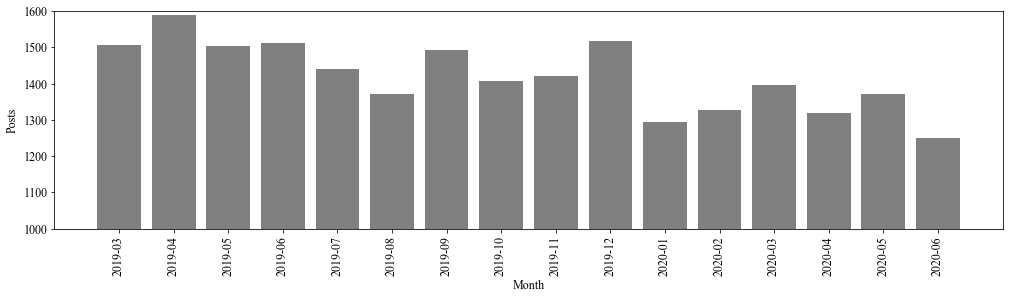

In [17]:
plot_bar_chart(plot_df)

In [18]:
get_total_percentage(plot_df)

-0.11130434782608696

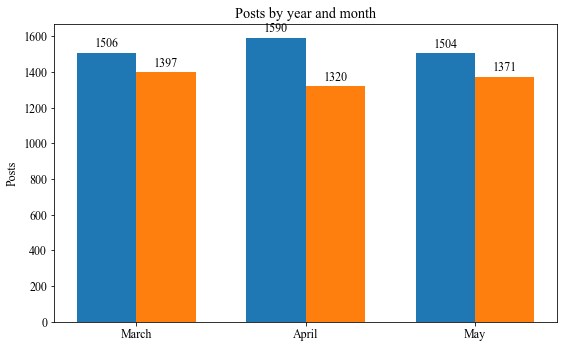

In [19]:
plot_two_bars(plot_df)

In [20]:
get_percentages(plot_df)

(-0.07237715803452856, -0.16981132075471697, -0.0884308510638298)

### Let's investigate the distribution of the decrease

In [31]:
del plot_df

In [32]:
plot_df = pd.DataFrame()

In [33]:
for user1 in df_posts.user.unique():
    user_df = df_posts[df_posts.user == user1]
    user_grouped_df = pd.DataFrame(user_df.groupby(["date_year_month2"]).size())
        
    try:
        a = user_grouped_df.loc["2019-03"].values[0]
    except:
        a = 0
        
    try:
        b = user_grouped_df.loc["2019-04"].values[0]
    except:
        b = 0
        
    try:
        c = user_grouped_df.loc["2019-05"].values[0]
    except:
        c = 0
        
    try:
        d = user_grouped_df.loc["2020-03"].values[0]
    except:
        d = 0
        
    try:
        e = user_grouped_df.loc["2020-04"].values[0]
    except:
        e = 0
        
    try:
        f = user_grouped_df.loc["2020-05"].values[0]
    except:
        f = 0
        
        
    total_3month_19 = a + b + c
    total_3month_20 = d + e + f

    month_sample = total_3month_19 + total_3month_20
    
    months_difference = -999
    
    if not(total_3month_20 == 0 or total_3month_19 == 0): 
        months_difference = (total_3month_20 - total_3month_19)/total_3month_19
    
    plot_df = plot_df.append({"user": user1,"months_difference":months_difference, "month_sample" : month_sample},ignore_index=True)

In [34]:
#Exclude outliers
plot_df = plot_df[plot_df.month_sample >= 30]
plot_df = plot_df[plot_df.months_difference != -999]
plot_df = plot_df[plot_df.months_difference < 1.5]

In [35]:
#Scaling
plot_df["months_difference"] = plot_df.months_difference.apply(lambda x: x*100)

In [36]:
plot_df

,month_sample,months_difference,user
0,127.0,-13.235294,lisaandlena
1,95.0,37.500000,dagibee
2,137.0,36.206897,pamela_rf
5,31.0,-27.777778,paola
6,111.0,-26.562500,stefaniegiesinger
7,81.0,-47.169811,melinasophie
8,132.0,-68.000000,lenameyerlandrut
9,32.0,90.909091,marcusbutler
11,44.0,9.523810,juliabeautx
12,138.0,-51.612903,lenagercke


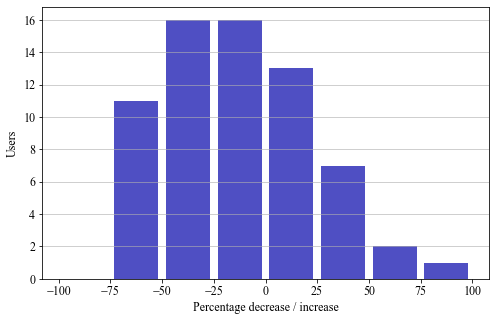

In [37]:
clean_bins = [-100,-75,-50,-25,0,25,50,75,100]

for feature in ["months_difference"]:

    n, bins, patches = plt.hist(x=plot_df[feature], bins=clean_bins, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    #plt.title(feature)
    plt.xlabel("Percentage decrease / increase")
    plt.ylabel("Users")
    plt.grid(axis='y', alpha=0.75)
    maxfreq = n.max()
    fig = plt.gcf()
    fig.set_size_inches(8, 5)
    #plt.savefig("distusers.pdf")
    plt.show()

### What about travel influencers? Did they less often?

In [39]:
plot_df = pd.DataFrame(df_posts[df_posts.url.isin(df_info[df_info.is_travel == True].url.values)].groupby(["date_year_month2"]).size())

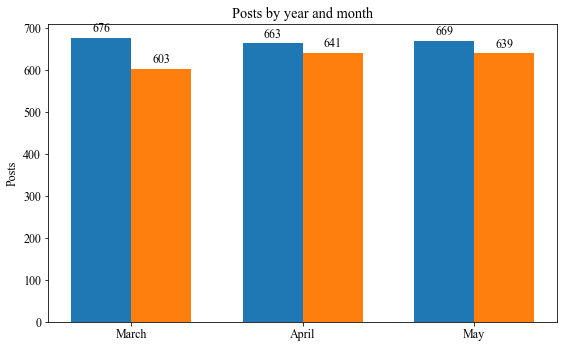

In [40]:
plot_two_bars(plot_df)

In [41]:
get_percentages(plot_df)

(-0.10798816568047337, -0.033182503770739065, -0.04484304932735426)

In [42]:
get_total_percentage(plot_df)

-0.062250996015936255

### So travel influencers didn't really stop posting... What about the complementary group?

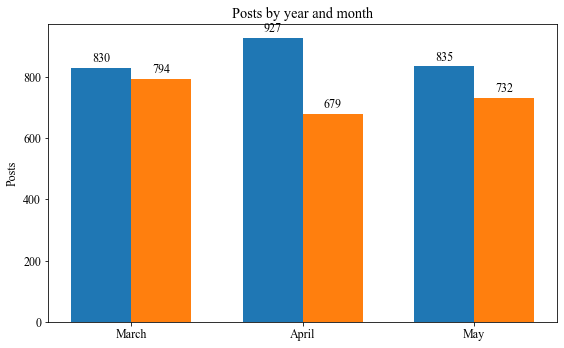

In [43]:
plot_df = pd.DataFrame(df_posts[df_posts.url.isin(df_info[df_info.is_travel == False].url.values)].groupby(["date_year_month2"]).size())
plot_two_bars(plot_df)

In [44]:
get_percentages(plot_df)

(-0.043373493975903614, -0.267529665587918, -0.12335329341317365)

In [45]:
get_total_percentage(plot_df)

-0.14930555555555555

In [47]:
#Receive list of influencers that are categorized as travel but not fashion
#np.setdiff1d(df_info[df_info.is_travel == True].url.values,df_info[df_info.is_fashion == True].url.values)

# 2) Theory: Behavior adoption (topic shift) prevents post volume decrease

### Influencers without topic shift

In [48]:
plot_df = pd.DataFrame(df_posts[df_posts.url.isin(df_info[df_info.has_topic_shift == False].url.values)].groupby(["date_year_month2"]).size())
#plot_two_bars(plot_df)
get_total_percentage(plot_df)

-0.15584854631507775

### Influencers with topic shift

In [49]:
plot_df = pd.DataFrame(df_posts[df_posts.url.isin(df_info[df_info.has_topic_shift == True].url.values)].groupby(["date_year_month2"]).size())
get_total_percentage(plot_df)

-0.031059683313032885

In [50]:
#Share of influencers with topic shift
len(df_info[df_info.has_topic_shift == True])/len(df_info)

0.3037974683544304

In [51]:
len(np.intersect1d(df_info[df_info.is_travel == True].url.values,df_info[df_info.has_topic_shift == True].url.values))/len(df_info[df_info.is_travel == True])

0.6896551724137931

In [52]:
len(np.intersect1d(df_info[df_info.is_travel == False].url.values,df_info[df_info.has_topic_shift == True].url.values))/len(df_info[df_info.is_travel == False])

0.08

In [53]:
len(df_info[df_info.is_travel == True])

29

# 3) Inspect a particular influencer

In [54]:
plot_df = pd.DataFrame(df_posts[df_posts.url.isin(["https://www.instagram.com/pamela_rf"])].groupby(["date_year_month2"]).size())
get_percentages(plot_df)

(0.3181818181818182, 0.35294117647058826, 0.42105263157894735)

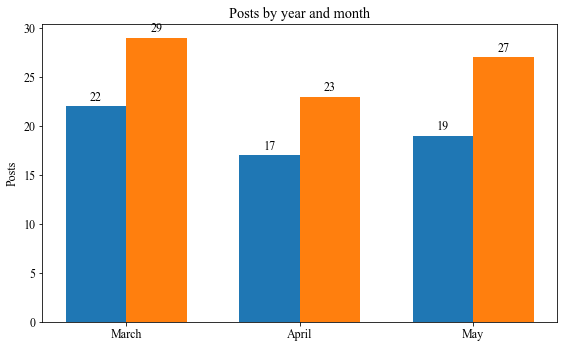

In [55]:
plot_two_bars(plot_df)

### Likes per post

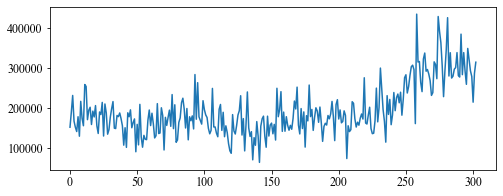

In [57]:
likes = list(filter(lambda x : x != 'Error', df_posts[df_posts.url.isin(["https://www.instagram.com/pamela_rf"])].likes.values))
likes.reverse()
likes = list(map(int, likes))
likes = pd.DataFrame(likes)
plt.figure(figsize=(8,3))
plt.plot(likes.index,likes[0])

# 4) How many influencers posted about CV-19 or BLM?

In [60]:
df_info.has_cv_19_post.value_counts()

False    63
True     16
Name: has_cv_19_post, dtype: int64

In [61]:
df_info.has_blm_post.value_counts()

True     58
False    21
Name: has_blm_post, dtype: int64

# 5) Theory: Ad volume decreased because of CV-19 lockdown

In [62]:
ad_keywords = ["Werbung","werbung","WERBUNG","Anzeige","anzeige","ANZEIGE"," #ad", "advertisement", "sponsored", "gesponsort", "promotion", "Promotion"]

In [63]:
#Test
any(word in 'some one long two phrase promotionthree' for word in ad_keywords)

True

In [64]:
df_posts["is_ad"] = df_posts.text.apply(lambda x: any(word in x for word in ad_keywords))

In [65]:
df_posts = df_posts[df_posts.date_year_month2 > "2019-02"]

In [66]:
df_ads = pd.DataFrame(df_posts.groupby(["date_year_month2","is_ad"]).size())

In [67]:
df_ads = df_ads.reset_index()

In [68]:
df_ads.head(4)

,date_year_month2,is_ad,0
0,2019-03,False,1036
1,2019-03,True,470
2,2019-04,False,1095
3,2019-04,True,495


In [69]:
df_ads[df_ads.date_year_month2 == '2019-03'][df_ads[df_ads.date_year_month2 == '2019-03'].is_ad == True][0].values[0]

470

In [70]:
df_ads.groupby("date_year_month2")[0].sum()["2019-03"]

1506

In [71]:
share_of_ads = []
for month in df_ads.date_year_month2.unique():
    share_of_ads.append(df_ads[df_ads.date_year_month2 == month][df_ads[df_ads.date_year_month2 == month].is_ad == True][0].values[0]/df_ads.groupby("date_year_month2")[0].sum()[month])

In [72]:
df_ads_aggregated = pd.DataFrame(df_posts.groupby(["date_year_month2"]).size())

In [73]:
df_ads_aggregated["share_of_ads"] = share_of_ads

In [74]:
total_ads = []
for month in df_ads.date_year_month2.unique():
    total_ads.append(df_ads[df_ads.date_year_month2 == month][df_ads[df_ads.date_year_month2 == month].is_ad == True][0].values[0])

In [75]:
df_ads_aggregated["total_ads"] = total_ads

In [76]:
df_ads_aggregated

,0,share_of_ads,total_ads
date_year_month2,,,
2019-03,1506,0.312085,470
2019-04,1590,0.311321,495
2019-05,1504,0.319814,481
2019-06,1511,0.342819,518
2019-07,1440,0.320833,462
2019-08,1372,0.274781,377
2019-09,1494,0.325301,486
2019-10,1408,0.332386,468
2019-11,1421,0.344828,490


### Proportion of ads of all posts

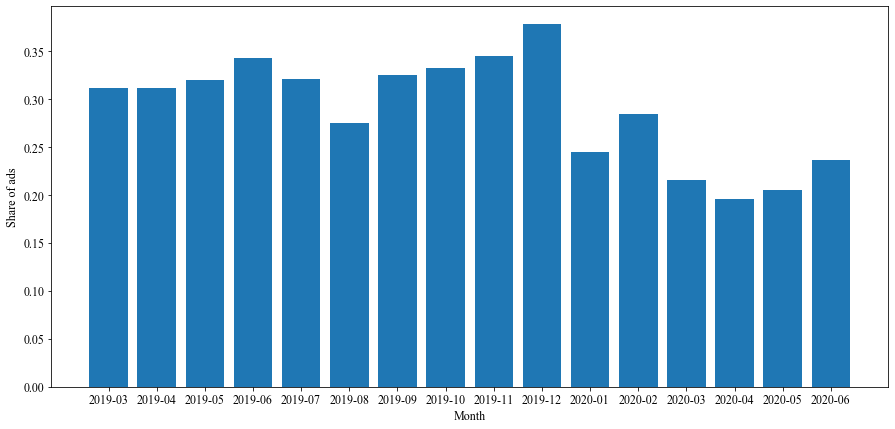

In [77]:
x = df_ads_aggregated.index
energy = df_ads_aggregated.share_of_ads

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(15,7))
plt.bar(x_pos, energy)
plt.xlabel("Month")
plt.ylabel("Share of ads")

plt.xticks(x_pos, x)

#axes = plt.gca()
#axes.set_ylim([1000,1600])

plt.show()

### Absolut amount of ads

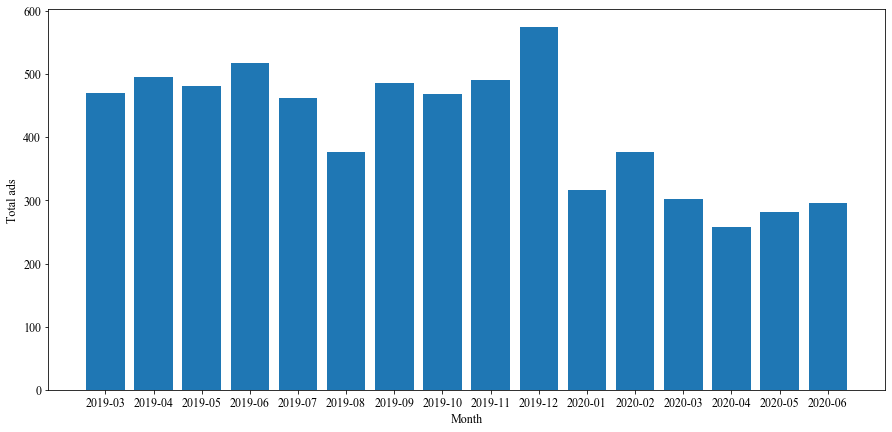

In [78]:
x = df_ads_aggregated.index
energy = df_ads_aggregated.total_ads

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(15,7))
plt.bar(x_pos, energy)
plt.xlabel("Month")
plt.ylabel("Total ads")

plt.xticks(x_pos, x)

#axes = plt.gca()
#axes.set_ylim([1000,1600])

plt.show()

In [79]:
get_total_percentage(pd.DataFrame(df_ads_aggregated["total_ads"]))

-0.41839557399723376

In [80]:
get_total_percentage(pd.DataFrame(df_ads_aggregated["share_of_ads"]))

-0.3462901253472711

# 6) Did the number of likes decrease?

In [81]:
df_likes = df_posts.sort_values(by = ["date"])

In [82]:
df_likes = df_likes[df_likes.likes != "Error"]

In [83]:
df_likes["likes"] = list(map(int, df_likes["likes"]))

In [84]:
df_likes.groupby(["date_year_month2"]).size()

date_year_month2
2019-03    1395
2019-04    1468
2019-05    1404
2019-06    1405
2019-07    1310
2019-08    1256
2019-09    1393
2019-10    1299
2019-11    1303
2019-12    1389
2020-01    1189
2020-02    1202
2020-03    1211
2020-04    1114
2020-05    1185
2020-06    1133
dtype: int64

In [85]:
df_likes.groupby(["date_year_month2"]).size().values

array([1395, 1468, 1404, 1405, 1310, 1256, 1393, 1299, 1303, 1389, 1189,
       1202, 1211, 1114, 1185, 1133], dtype=int64)

In [86]:
likes_per_post = df_likes.groupby(["date_year_month2"]).likes.sum().values / df_likes.groupby(["date_year_month2"]).size().values

In [87]:
likes_per_post

array([41426.94121864, 38836.53065395, 38706.68376068, 40758.58434164,
       41109.62977099, 45305.62261146, 38613.67982771, 38970.06543495,
       36503.12663085, 42530.81209503, 41163.98738436, 40508.86272879,
       41883.00082576, 39407.93357271, 41468.30379747, 40859.18623124])

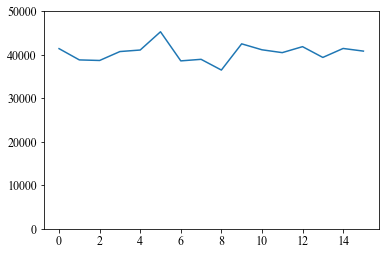

In [88]:
plt.plot(likes_per_post)
axes = plt.gca()
axes.set_ylim([0,50000])
plt.show()

In [89]:
likes_per_post.mean()

40503.30943039005

In [90]:
likes_per_post.std()

1952.3329698307234

### Top posts (likes)

In [101]:
df_likes = df_posts.sort_values(by=["likes"],ascending=False)

In [102]:
df_likes = df_likes[df_likes.likes != "Error"]
df_likes["likes"] = list(map(int, df_likes["likes"]))

In [103]:
df_likes = df_likes.sort_values(by=["likes"],ascending=False)

In [105]:
df_likes.head(20)

,url,timestamp,text,likes,video_views,date,date_year_month,date_year_month2,date_year_week,user
245,https://www.instagram.com/lisaandlena,2019-06-17T07:59:31.000Z,>🎉17🎊<br>Thanks for all the birthday wishes!<b...,786747,Error,2019-06-17 07:59:31+00:00,2019-June,2019-06,2019-24,lisaandlena
42,https://www.instagram.com/lisaandlena,2020-05-12T10:06:23.000Z,>Wanted something new💇🏼‍♀️✨,727475,Error,2020-05-12 10:06:23+00:00,2020-May,2020-05,2020-19,lisaandlena
159,https://www.instagram.com/lisaandlena,2019-11-09T16:08:39.000Z,"title=""Bearbeitet"">Well this is how our morni...",627196,Error,2019-11-09 16:08:39+00:00,2019-November,2019-11,2019-44,lisaandlena
285,https://www.instagram.com/lisaandlena,2019-04-21T09:04:32.000Z,">Jesus is alive,<br>he is risen from the death...",602759,Error,2019-04-21 09:04:32+00:00,2019-April,2019-04,2019-15,lisaandlena
140,https://www.instagram.com/lisaandlena,2019-12-11T11:56:26.000Z,>Wow it’s crazy how the time flies!!<br>This w...,599643,Error,2019-12-11 11:56:26+00:00,2019-December,2019-12,2019-49,lisaandlena
955,https://www.instagram.com/julienco_,2019-11-16T10:13:56.000Z,>mini - me👶🏼<br>Gestern war soo ein schöner Ta...,597742,Error,2019-11-16 10:13:56+00:00,2019-November,2019-11,2019-45,julienco_
50,https://www.instagram.com/lisaandlena,2020-05-07T10:13:22.000Z,"title=""Bearbeitet"">We’re so excited to be bac...",593241,Error,2020-05-07 10:13:22+00:00,2020-May,2020-05,2020-18,lisaandlena
957,https://www.instagram.com/julienco_,2019-10-19T08:55:04.000Z,>3 Generationen ❤️ die 2 wichtigsten ‚Männer‘ ...,586604,Error,2019-10-19 08:55:04+00:00,2019-October,2019-10,2019-41,julienco_
214,https://www.instagram.com/lisaandlena,2019-08-07T06:40:12.000Z,">Good morning from us, well just from me Lena ...",530721,Error,2019-08-07 06:40:12+00:00,2019-August,2019-08,2019-31,lisaandlena
2458,https://www.instagram.com/lenagercke,2020-01-12T11:55:26.000Z,>1+1=3 ❤️❤️❤️,529573,Error,2020-01-12 11:55:26+00:00,2020-January,2020-01,2020-01,lenagercke
